In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [75]:
data = pd.read_csv('diabetes1.csv')

In [76]:
data = data.drop(columns='Unnamed: 0')
df = data.copy(deep=True)

In [77]:
df = df[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age','Outcome']]

In [78]:
df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,33.6,0.627,50,1
1,1,85.0,26.6,0.351,31,0
2,8,183.0,23.3,0.672,32,1
3,1,89.0,28.1,0.167,21,0
4,0,137.0,43.1,2.288,33,1
...,...,...,...,...,...,...
763,10,101.0,32.9,0.171,63,0
764,2,122.0,36.8,0.340,27,0
765,5,121.0,26.2,0.245,30,0
766,1,126.0,30.1,0.349,47,1


<Axes: xlabel='Outcome', ylabel='count'>

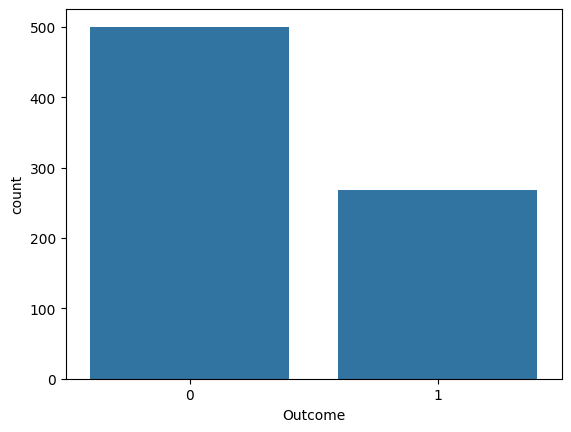

In [49]:
sns.barplot(data = df['Outcome'].value_counts())

In [50]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [51]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [54]:

clf = RandomForestClassifier()
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [55]:

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.66      0.78      0.72        55

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



In [56]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

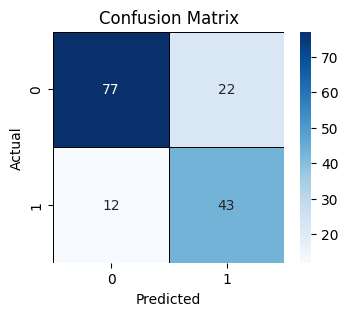

In [57]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True,
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
X.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [81]:
Pregnancies = 1
Glucose = 85.0
BMI = 26.6
DiabetesPedigreeFunction = 0.351
Age = 31

In [82]:
X.columns = ['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age']
input = np.array([[Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age]]).astype(np.float64)
ypred = clf.predict(input)
ypred

c:\Users\MICRO\Downloads\JOML\MeriSkill\Meriskill-Intership\env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)